In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [309]:
means = [[2, 2], [4, 2]]
cov = [[.2, .0], [.0, .2]]

N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

In [280]:
# def exponential(x, a, b):
#     return a*np.exp(b*x)

# def circle(x, r):
#     return 

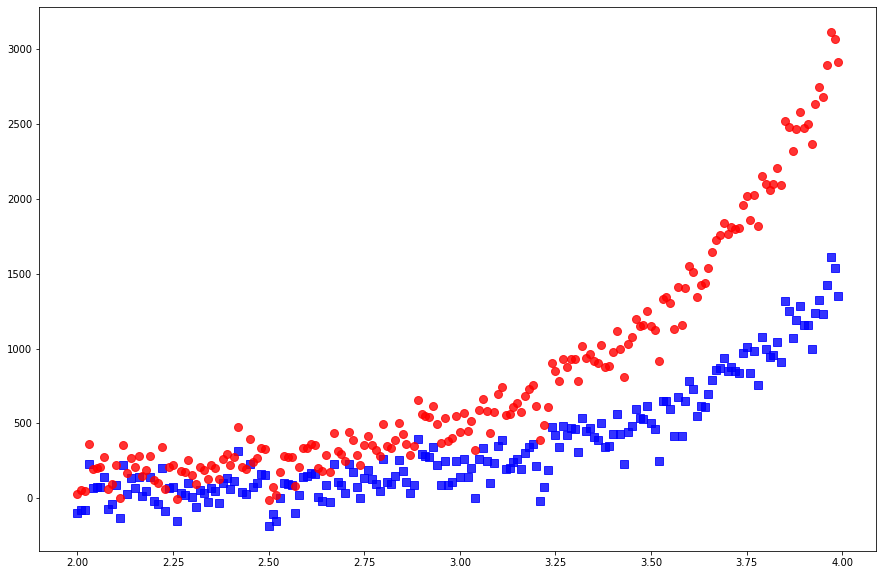

In [308]:
# x1 = np.arange(2, 4, 0.01)
# y1 = exponential(x1, 0.5, 2)

# x2 = np.arange(2, 4, 0.01)
# y2 = exponential(x2, 1, 2) + 100

# noise = 100*np.random.normal(size=y1.size)

# y1 = y1 + noise
# y2 = y2 + noise

# fig = plt.figure(figsize = (15,10))
# plt.plot(x1, y1, 'bs', markersize = 8, alpha = .8)
# plt.plot(x2, y2, 'ro', markersize = 8, alpha = .8)
# plt.show()

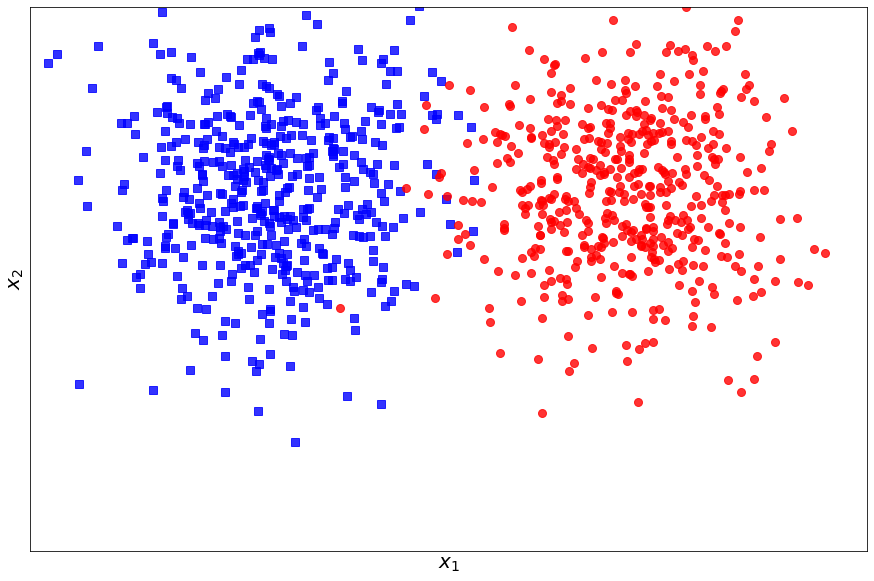

In [310]:
fig = plt.figure(figsize=(15, 10))

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)

# hide tikcs 
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

In [311]:
X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), np.zeros(N)))

In [312]:
X.shape

(1000, 2)

In [313]:
y.shape

(1000,)

In [314]:
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])

In [315]:
w_init.shape

(3,)

In [316]:
def predict(x, w):
    preds = np.dot(x, w)
    preds[np.where(preds >= 0)] = 1
    preds[np.where(preds < 0)] = 0
    return preds

In [317]:
def calculate_cost(y, y_pred):
    return (1/2)*np.mean((y - y_pred)**2)

In [318]:
def visualize_process(X, y, w):
    fig = plt.figure(figsize=(15, 10))
    
    plt.plot(X[:N, 1], X[:N, 2], 'bs', markersize = 8, alpha = .8)
    plt.plot(X[N:, 1], X[N:, 2], 'ro', markersize = 8, alpha = .8)
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        
#         x1 = np.arange(x11, x12, 0.01)
#         y2 = x11
#         y1 = -(w1*x1+ w0)/w2
        
        plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        plt.plot([x10, x10], [-100, 100], 'k')
        
    plt.show()
    pass

In [319]:
def fit(X, y, w, learning_rate = 1, epochs = 1000):
    
    history = {}
    total_loss = []
    total_acc = []
    bucket = {}
    temp = epochs
    
    while temp > 0:
        not_update = False
        
        y_pred = predict(X, w)

        error_idxs = np.where(np.equal(y, y_pred) == False)[0]
            
        num_errors = error_idxs.shape[0]
        loss = calculate_cost(y, y_pred)
        total_loss.append(loss)
        
        print(f'Num errors of epoch {epochs - temp} is {num_errors}')
        
        if num_errors == 0:
            print('All points are correctly classified, stop training')
            print()
            return w
        
        for mis_p in error_idxs:
            error = y[mis_p] - y_pred[mis_p]

            w = w + learning_rate*error*X[mis_p].T
#             visualize_process(X, y, w)
        
        print('Best model so far')
        for k, v in bucket.items():
            print(k + ': ' + str(v))
            
        if len(bucket) == 0 or num_errors < bucket['num_error']:
            bucket['num_error'] = num_errors
            bucket['w'] = w
        else:
            previous_num_error = bucket['num_error']
            not_update = True
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
        accuracy = (X.shape[0] - num_errors) / X.shape[0]
        total_acc.append(accuracy)
        
        if not_update:
            print(f'Epochs {epochs - temp} has {num_errors} misclassified points which does not \
improve compare to best model so far which has {previous_num_error} misclassified points')
            print()
        else:
            print(f'Epoch {epochs - temp}: Loss: {loss} and Accuracy: {accuracy}')
            print()
        temp -= 1
        
    history['loss'], history['acc'], history['epochs'] = total_loss, total_acc, range(epochs)
    
    return bucket['w'], bucket['num_error'], history

In [ ]:
w, mis, history = fit(Xbar, y, w_init, 0.01, 2000)

In [321]:
w

array([19.21042138, -7.06403928,  0.91033711])

In [322]:
mis

12

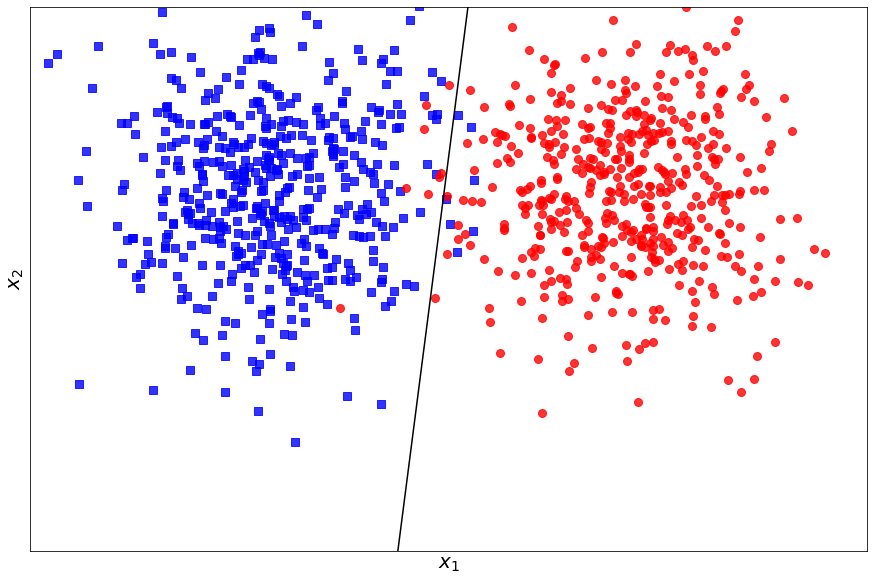

In [323]:
visualize_process(Xbar, y, w)

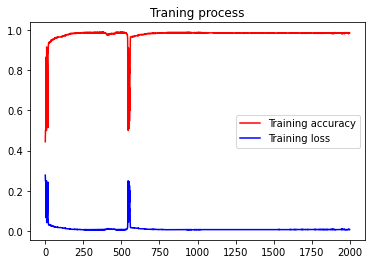

<Figure size 432x288 with 0 Axes>

In [324]:
acc = history['acc']
loss = history['loss']
epochs = history['epochs']
plt.plot(epochs, acc, label = 'Training accuracy', color = 'r')
plt.plot(epochs, loss, label = 'Training loss', color = 'b')
plt.title('Traning process')
plt.legend()

plt.figure()
plt.show()